# Lecture 9
# Section 4: Working with Categorical Data

![Scale]( 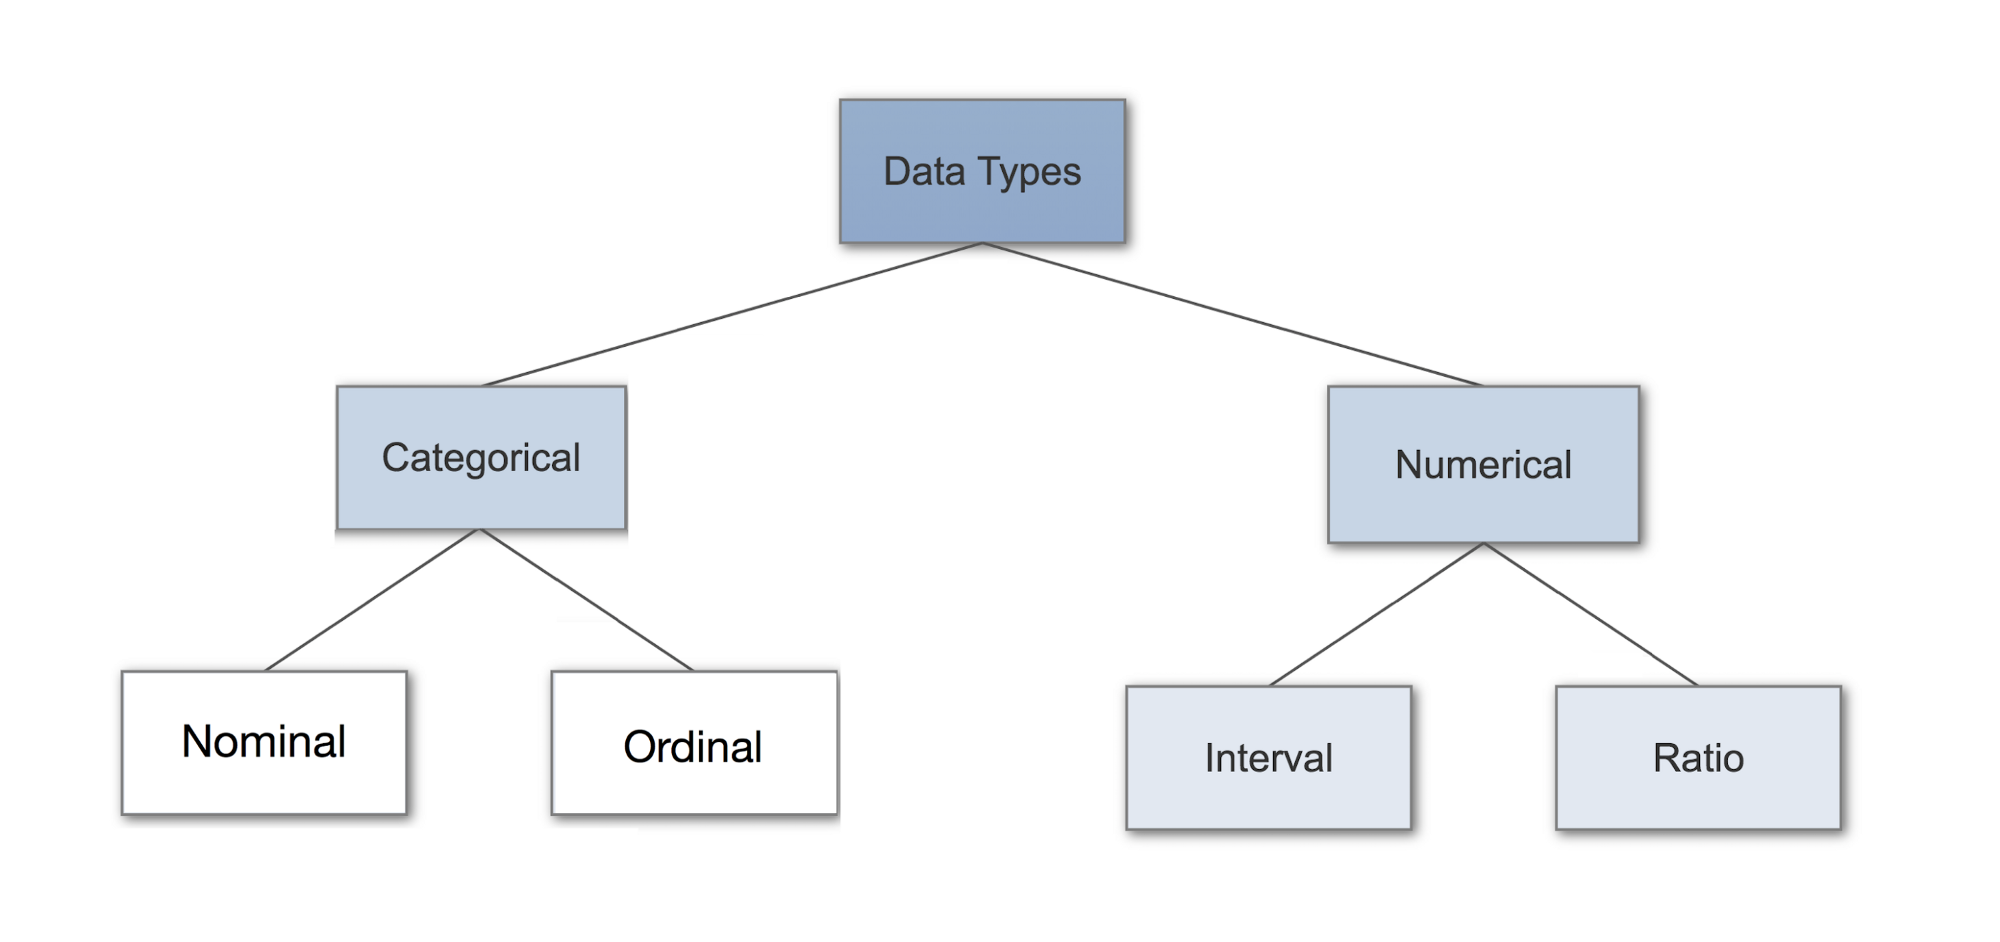)

* Categorical
    - Nominal Scale (*in Pandas this is called categorical data*)
        - categories of data, but categories have no order
        - e.g. genotype, blood type, zip code, gender, race, eye color, political party, company names
    - Ordinal Scale (*in Pandas this is categorical data with* `ordered` *Flag*)
        - the order of the units is important, but not evenly spaced
        - e.g. american grades such as *A+*, *A*
        - e.g. socio economic status (*low income*,*middle income*,*high income*)
* Numerical
    - Ratio scale:
        - units are equally spaced
        - mathematical operations of + - / * are valid
        - e.g. length, height or weight, temperature in Kelvin
     - Interval Scale:
        - Unit are equally spaced, but there is no true zero
        - e.g. temperature (Celcius), temperature (Farenheit), pH

**Nominal scale**. Here the names of companies could be a good example. There is a limited number of companies, but changing their order or assigning them a mathematical function is meaningless. (You could arrange them alphabetically, but that has no real meaning.)

**Ordinal scale**. In the ordinal scale the order of values is important but the differences between the values are not equally spaced. Ordinal data is very common in machine learning and can sometimes be a challenge to work with.

**Ratio scale**. In the ratio scale the measurements units are equally spaced and mathematical operations, such as subtract, division, and multiplication are all valid. Good examples of ratio scale measurements might be the height and weight.

**Interval scale**. In the interval scale the measurement units are equally spaced like the ratio scale. But there's no clear absence of value. That is there isn't a true zero, and so operation such as multiplication and division are not valid. An example of the interval scale might be the temperatures measured in Celsius or Fahrenheit. Since there's never an absence of temperature and 0 degrees is a meaningful value of temperature.

These scales are quite important in Statistics and Machine Learning. Pandas has a number of interesting functions to deal with converting between measurement scales. Let's start first with **nominal data**, which in Pandas is called **categorical data**.

## CategoricalDtype

Panda actually has a built in type for categorical data (**that is the nominal scale**) and you could set a column of your data to categorical data by using the `astype` method. `astype` tries to change the underlying type of your data, in this case to category data. 

You can further change this to **ordinal data** by passing in an ordered flag set to true and passing in the categories in an ordered fashion.

Here's an example. Let's create a data frame of letter grades in the descending order. We can also set an index value of some more course grain measure.

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

Now when we instruct Pandas to render this as categorical data, we see that the `dtype` has been set as category and that there are 11 different categories.

In [ ]:
df['Grades'].astype('category').head()

If we want to indicate to Pandas that this data is in a logical order, we need an instance of `CategoricalDtype`. We can pass the `ordered` equals `True` flag to this instance. 

In [ ]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], ordered=True)

We assign this instance of `CategoricalDtype` as the datatype.

In [ ]:
grades = df['Grades'].astype(cat_type)

And we see those reflected in the category `dtype` using the less than sign. 

In [ ]:
grades.head()

What can you do with this? Ordinal data has ordering so it can help you with the Boolean masking. For instance, if we have our list of grades and we compared them with a `C`. If we did this lexographically, we would see that a `C+` and a `C-` are both actually greater than a `C`.

In [ ]:
grades > 'C'

Instead of coding each of these to something which is lexographical, like a number, we can indicate that there's a clear order to the data. And then broadcasting will work as we expect. We can then use a certain set of mathematical operators like minimum, maximum and others on the ordinal data.


In [ ]:
from pandas.api.types import CategoricalDtype
s = pd.Series(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'])
cat_type = CategoricalDtype(categories=['Low','Medium','High'], ordered=True)
s.astype(cat_type)

## Dummy variables

Variables with a Boolean value are typically called dummy variables. And Pandas has a built-in function called `get_dummies`, which will convert the values of a single column into multiple columns of 0's and 1's, indicating the presence of a dummy variable.

In [ ]:
df = pd.DataFrame({'sx': ['male', 'male', 'female','male'], 'title': ['Dr', 'Dr', 'Dr','MSc']})
df

The `get_dummies` function converts a categorical variable into dummy/indicator variables.

In [ ]:
pd.get_dummies(df['sx'])

## Bin values into discrete intervals

There is another function on scales. It consists in reducing a value that is on the interval or ratio scale, like a number grade, to a categorical value, like a letter grade.

The application of this is to reduce dimensionality, which could be useful for Machine Learning.

Pandas has a function called `cut`, which takes in argument which is some real like structure of a column or a data frame or a series. It also takes a number of bins to be used and all bins are kept at equal spacing. Further, the `labels` argument is used to specify the labels for the returned bins.

Note: When using cut, bins will be **evenly spaced** according to the values themselves and not **the frequency** of those values.

For the example we define a Series with 18 age values ranging from 9 to 80.

In [ ]:
import pandas as pd

In [ ]:
df_ages = pd.DataFrame({'age': [14, 17, 23, 30, 35, 29, 58, 21, 38, 60, 41, 64, 40, 70, 75, 80, 11, 9] })
df_ages

If we further apply `cut` (and in comparison `qcut`) to this with say three bins, we can see that the age values are categories in age groups, such as `young`, `medium` and `old`.

The pandas documentation describes qcut as a “Quantile-based discretization function.” 

The major distinction is that `qcut` will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, `cut` will segment and sort data into evenly spaced bin.  There is no guarantee about the distribution of items in each bin.

In [ ]:
# Evenly spaced buckets
df_ages['cut-buckets'] = pd.cut(df_ages['age'], 3)
df_ages['cut-range'] = pd.cut(df_ages['age'], 3, labels=['Young', 'Medium', 'Old'])

In [ ]:
# buckets based on frequency
df_ages['qcut-buckets'] = pd.qcut(df_ages['age'], 3)
df_ages['qcut-range'] = pd.qcut(df_ages['age'], 3, labels=['Young', 'Medium', 'Old'])

In [ ]:
df_ages['cut-range'].dtypes

In [ ]:
df_ages.sort_values(by='age', ascending=True)

As we just have seen the the buckets in `cut-buckets` and `qcut-buckets` have a different range. We can directly look at those now.

In [ ]:
df_ages['cut-buckets'].unique()

In [ ]:
df_ages['qcut-buckets'].unique()

this means that the items will be differently distributed in the `cut` vs the `qcut` bins.

In [ ]:
dfbar = pd.DataFrame()
dfbar['cut'] = df_ages['cut-range'].sort_values(ascending=True).value_counts()
dfbar['qcut'] = df_ages['qcut-range'].sort_values(ascending=True).value_counts()
print(dfbar)

In [ ]:
# cut and qcut comparision
dfbar.plot(kind='bar')